In [6]:
import os
import tensorflow as tf
import pickle
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt 
from scipy import ndimage

In [7]:
# defining paths
path_to_new_frames = '/Volumes/tki/EngelhardtGroup/Saskia/data/exported_frames'
main_dir_path = os.path.join(path_to_new_frames, "flow/single_z")
path_to_med_filters = '/Users/saskia/unibe19/master_thesis/TKI_project/med_filters' 
saving_path = '/Users/saskia/unibe19/master_thesis/TKI_project/data/preprocess_channel_images/flow/single_z'

### channel 1

In [8]:
### import med filter for channel 1
med_filt_c1 = pickle.load(open(os.path.join(path_to_med_filters, "med_filt_c1.pckl"), "rb"))

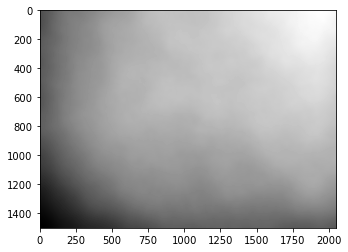

In [9]:
plt.imshow(med_filt_c1, cmap = 'gray')

#### see where to above-clip:

In [19]:
res_img = []

for root, subdirs, files in os.walk(main_dir_path):
    for name in files: 
        if ('c001' in name):
            path = os.path.join(root, name)
            img = Image.open(path)
            
            # convert image to numpy array
            data = np.asarray(img) 
            
            # subtract median filter (A-B) 
            res = np.subtract(data, med_filt_c1)

            # clip to zero 
            clipped = np.clip(res, a_min = 0, a_max = 255)
            
            res_img.append(clipped)
            

In [20]:
res_img = np.array(res_img)

In [21]:
flat_pixels = res_img.flatten()

(array([8.43633e+05, 7.97005e+05, 7.56158e+05, 7.15272e+05, 6.79705e+05,
        6.43208e+05, 6.11275e+05, 5.76628e+05, 5.47859e+05, 5.17646e+05,
        4.93247e+05, 4.65565e+05, 4.43895e+05, 4.19463e+05, 3.99769e+05,
        3.76550e+05, 3.59376e+05, 3.38856e+05, 3.22902e+05, 3.04508e+05,
        2.91773e+05, 2.75690e+05, 2.62753e+05, 2.47436e+05, 2.36877e+05,
        2.24020e+05, 2.13097e+05, 2.02642e+05, 1.92691e+05, 1.82634e+05,
        1.74624e+05, 1.64966e+05, 1.57826e+05, 1.49914e+05, 1.42747e+05,
        1.35063e+05, 1.29282e+05, 1.22650e+05, 1.17356e+05, 1.11511e+05,
        1.06178e+05, 1.00400e+05, 9.67310e+04, 9.16230e+04, 8.78930e+04,
        8.25630e+04, 7.98170e+04, 7.58350e+04, 7.93180e+04, 9.31900e+04,
        8.88890e+04, 8.32650e+04, 7.37560e+04, 7.46150e+04, 8.78890e+04,
        9.73880e+04, 8.00920e+04, 7.76830e+04, 7.54560e+04, 1.12603e+05,
        1.41061e+05, 3.72165e+05, 4.14039e+05, 1.65755e+05, 8.97600e+04,
        7.51430e+04, 8.25410e+04, 6.05370e+04, 5.41

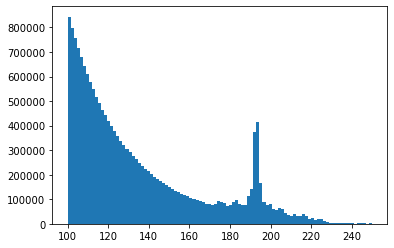

In [22]:
plt.hist(flat_pixels, bins=100, range=(100, 250)) 

$\rightarrow$ clip at 180

#### remove artefacts

- for all channel, bright dots were removed by clipping between 0 and 180 
- for channel 1 (VE-cadherin), the artefact *slope* was remove by substracting the median filter 

In [21]:
for root, subdirs, files in os.walk(main_dir_path):
    for name in files: 
        if ('c003' in name):
            path = os.path.join(root, name)
            dir_name = os.path.basename(os.path.dirname(path))
            img = Image.open(path)
            
            # convert image to numpy array
            data = np.asarray(img) 
            
            # subtract median filter (A-B) for channel 'c001'
            #res = np.subtract(data, med_filt_c1)

            # clip to zero and 180
            # 180 threshold was choose with the help of the histogram 
            clipped = np.clip(data, a_min = 0, a_max = 180) 
            
            # scale to 0-255 
            data = clipped.astype(np.float64) / clipped.max() # normalize the data to 0 - 1
            data = 255 * data # scale by 255
            img = data.astype(np.uint8)
            
            # save resulting image 
            im = Image.fromarray(img)
            sav_path = os.path.join(saving_path, dir_name) 
            
            if not os.path.exists(sav_path):
  
                # create a new directory because it does not exist 
                os.makedirs(sav_path)
            
            # pre-process images were saved 
            im.save(os.path.join(os.path.join(saving_path, dir_name), name))
                        